![Image](resources/banner.jpg)

<h1 align="center">Allen Brain Observatory Visual Coding Neuropixels </h1> 
<h2 align="center"> Day 1, Morning Session. SWDB 2024 </h2> 

<h3 align="center">Monday, August 19, 2023</h3> 

The Allen Brain Observatory Visual Coding Neuropixels dataset is a large-scale survey of physiological activity in mouse visual cortex in response to a variety of visual stimuli under passive viewing conditions.  The animals are head-fixed but free to run on a disc.  Electrophysiological recording with Neuropixels probes is performed in different areas and layers.  This notebook is a brief introduction to get you started with this data set and lead you to resources for you to explore further.

***What kind of questions can you answer with this dataset?***

This dataset contains recordings of activity in response to a variety of natural and artificial visual stimuli.  This makes it suitable for a variety of coding questions.

- How are stimuli and features from the external world encoded in neural responses?  
- How do the encoding properties differ across areas and layers?  In different cell lines?
- Can you build predictive models of response from stimuli?
- How are running activity and pupil size related to cortical activity?
- How can information about the stimuli and/or the animal's state be extracted from neural activity?  Can you decode stimuli?
- Do neurons coordinate their activity?  Do the act in ensembles?  
- Is there any spatial aspect to neural information?

These are just some of the questions that might be addressed from this type of data.  

***Why electrophysiology?***

- You get high temporal resolution.
- You are able to see low firing rate activity (but not a complete lack of activity).

***Why NOT electrophysiology?***

- A more constrained spatial arrangement of recordings.
- No firing whatsoever means you never record the cell.
- Limited number of units per areas relative to two-photon imaging.

**Databook**

The databook is a resource for more in-depth information and examples for the Allen Brain Observatory Visual Coding Two-photon dataset.  You can find the pages for this data set here:  https://allenswdb.github.io/physiology/ophys/visual-coding/vc2p-background.html

![Image](resources/databook_vc2p.png)

***Remember the tools you have!***

- Use the databook as a reference; this notebook contains only a small portion of what is in the databook!
- Use the help function to find function arguments
- Use `dir` to see data and functions in an object
- Use tab complete in jupyter 

Using the Python objects we'll show you below, you can extract information about this dataset such as how many recordings are available.

For each ...

- Spike times for identified units
- quality control metrics
-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import platform, os

%matplotlib inline

The following cell sets up a path variable so that this notebook will work on the cloud or using data accessed locally, e.g. from your hard drive.

In [2]:
# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2023/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2024/"

This dataset is accessed via the `allensdk` python package.  It requires instantiating an `EcephysProjectCache` object that we usually call `cache`.  You'll access all of the data for this dataset using this object.

In [3]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [4]:
manifest_path = os.path.join(data_root, "allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [5]:
cache.get_all_session_types()

['brain_observatory_1.1', 'functional_connectivity']

![Image](resources/neuropixels_stimulus_sets.webp)

You can get information about which sessions are available with the following:

In [6]:
sessions = cache.get_session_table()
sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


Data on an individual session can be accessed by using the method `get_session_data` with the `cache` object.  It takes an argument that is the session id.  This is the index of the table returned as `sessions` above.

If your data is not mounted correctly, you should get a download warning here.

In [7]:
session_id = 715093703
session_data = cache.get_session_data(session_id)

/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)


Two important sources of information about each session are the `metadata` and the `structurewise_unit_counts`

In [8]:
session_data.metadata

/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9

{'specimen_name': 'Sst-IRES-Cre;Ai32-386129',
 'session_type': 'brain_observatory_1.1',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'sex': 'M',
 'age_in_days': 118.0,
 'rig_equipment_name': 'NP.1',
 'num_units': 884,
 'num_channels': 2219,
 'num_probes': 6,
 'num_stimulus_presentations': 70388,
 'session_start_time': datetime.datetime(2019, 1, 19, 0, 54, 18, tzinfo=tzoffset(None, -28800)),
 'ecephys_session_id': 715093703,
 'structure_acronyms': ['PO',
  'PoT',
  'LP',
  'DG',
  'CA1',
  'VISp',
  nan,
  'LGd',
  'CA3',
  'VISl',
  'VISrl',
  'grey',
  'VISpm',
  'VISam',
  'APN',
  'MB'],
 'stimulus_names': ['spontaneous',
  'gabors',
  'flashes',
  'drifting_gratings',
  'natural_movie_three',
  'natural_movie_one',
  'static_gratings',
  'natural_scenes']}

In [9]:
session_data.structurewise_unit_counts

CA1      145
LP       139
grey     117
LGd       82
PO        76
VISrl     76
VISp      60
VISpm     50
VISl      42
VISam     30
APN       26
DG        26
CA3       14
PoT        1
Name: ecephys_structure_acronym, dtype: int64

Recorded spike times can be accessed with `session_data.spike_times`, which returns a dictionary whose keys are unit ids and values are numpy arrays of individual spike times in seconds.

In [10]:
session_data.spike_times

{950910364: array([  28.84356329,   28.88129668,   28.88569669, ..., 9616.00059437,
        9616.01859439, 9616.02302773]),
 950910371: array([  28.8288966 ,   28.87829668,   28.90686339, ..., 9615.89659421,
        9615.93042759, 9615.94366095]),
 950910531: array([  30.20799886,   31.88936829,   31.92093501, ..., 9615.83972746,
        9615.89969421, 9615.95006096]),
 950910576: array([  29.30956405,   29.34749745,   29.92093172, ..., 9615.7767607 ,
        9615.79399406, 9615.82636077]),
 950910549: array([  29.78356483,   29.92329839,   30.50239934, ..., 9615.78499404,
        9615.87499418, 9615.88712753]),
 950910603: array([  28.84872996,   28.86136332,   28.87433   , ..., 9615.94849429,
        9615.98246101, 9616.00442771]),
 950910671: array([  28.82706326,   28.83599661,   28.85689664, ..., 9610.98922016,
        9612.27035542, 9615.14129307]),
 950910664: array([  70.54386507,   79.13024583,   83.2779193 , ..., 9548.92326007,
        9556.96280551, 9573.30196343]),
 9509107

Let's make a raster plot of these spike times.  There are a lot of units in this session, so let's focus on the units in VISp.

In [11]:
session_units = session_data.units
session_units.head()

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950910352,0.476196,106.785900,0.057700,6,419.57,4.576155,4.532385,0.029797,69.455405,0.002020,...,215.0,APN,8157,3521,6697,probeA,See electrode locations,29999.954846,1249.998119,True
950910364,0.953652,85.808775,0.065649,7,231.42,5.602703,31.486161,0.005998,102.847616,0.000146,...,215.0,APN,8154,3513,6698,probeA,See electrode locations,29999.954846,1249.998119,True
950910371,0.615593,76.898055,0.015509,8,209.31,5.061817,17.328610,0.005242,76.907610,0.004522,...,215.0,APN,8146,3487,6701,probeA,See electrode locations,29999.954846,1249.998119,True
950910392,0.616317,120.519555,0.025891,11,179.71,4.219074,16.262414,0.096884,65.671206,0.007306,...,215.0,APN,8133,3444,6707,probeA,See electrode locations,29999.954846,1249.998119,True
950910435,0.174735,66.974895,0.010061,17,99.99,6.393051,62.326305,0.004243,294.002222,0.000136,...,215.0,APN,8110,3367,6719,probeA,See electrode locations,29999.954846,1249.998119,True


In [12]:
visp_units = session_units[session_units.ecephys_structure_acronym=='VISp']
visp_units

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950930145,7.031742,102.55557,0.082525,410,202.02,4.343827,9.910598,0.011634,78.408045,2.632316e-03,...,385.0,VISp,8586,1465,8212,probeC,See electrode locations,29999.98547,1249.999395,True
950930105,0.601677,79.86069,0.095761,408,145.08,5.052111,11.054619,0.011082,100.175018,6.946857e-03,...,385.0,VISp,8584,1477,8213,probeC,See electrode locations,29999.98547,1249.999395,True
950930276,0.517356,82.90425,0.013349,415,101.96,3.670607,8.772900,0.025294,75.644463,2.471958e-03,...,385.0,VISp,8591,1441,8210,probeC,See electrode locations,29999.98547,1249.999395,True
950933698,0.476703,107.32878,0.000023,601,152.21,4.428315,1.277709,0.025923,47.931608,4.304661e-03,...,385.0,VISp,8589,1453,8211,probeC,See electrode locations,29999.98547,1249.999395,True
950930237,0.567728,134.57301,0.001889,413,81.63,3.703712,3.280311,0.023598,50.545418,8.738876e-03,...,385.0,VISp,8589,1453,8211,probeC,See electrode locations,29999.98547,1249.999395,True
950930215,0.359911,87.88728,0.013366,412,169.21,3.084614,6.514440,0.252301,58.611018,6.694053e-03,...,385.0,VISp,8589,1453,8211,probeC,See electrode locations,29999.98547,1249.999395,True
950930358,0.503798,91.88673,0.064225,419,169.25,3.543693,10.520547,0.318126,70.577696,5.913075e-03,...,385.0,VISp,8596,1416,8207,probeC,See electrode locations,29999.98547,1249.999395,True
950930340,0.480842,183.61161,0.000018,418,51.22,4.752755,1.674368,0.000000,55.450465,2.078934e-03,...,385.0,VISp,8596,1416,8207,probeC,See electrode locations,29999.98547,1249.999395,True
950930437,0.696938,107.46294,0.007229,425,200.18,5.016815,1.264046,0.211893,53.323600,1.602134e-03,...,385.0,VISp,8601,1392,8205,probeC,See electrode locations,29999.98547,1249.999395,True


In [13]:
visp_spike_times = {uid: st for uid, st in session_data.spike_times.items() if uid in visp_units.index}
len(visp_spike_times)

60

Text(0.5, 1.0, 'Spike raster for VISp units recorded in session 715093703')

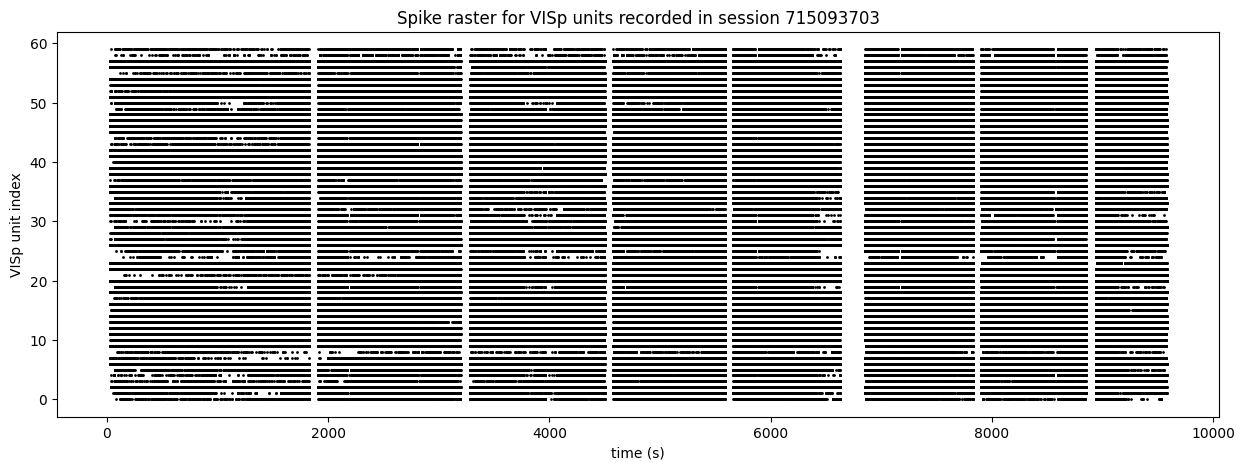

In [14]:
fig, ax = plt.subplots(figsize=(15,5))

for i, (unit_id, st) in enumerate(visp_spike_times.items()):
    ax.plot(st, np.zeros(len(st))+i, 'ko', markersize=1)
    
ax.set_ylabel('VISp unit index')
ax.set_xlabel('time (s)')
ax.set_title('Spike raster for VISp units recorded in session {}'.format(session_id))

Why are there gaps in the spike times?  Occasionally there were issues with a recording session that did not invalidate the whole experiment, but did invalidate time intervals within the experiment.  You can see these times directly with `session_data.get_invalid_times`.  For some analyses you may have to be aware of these times and explicitly account for them.

In [15]:
session_data.get_invalid_times()

,start_time,stop_time,tags
id,,,
0,1830.70,1910.47,"[EcephysProbe, 810755801, probeC]"
1,3196.68,3281.44,"[EcephysProbe, 810755801, probeC]"
2,4500.09,4578.29,"[EcephysProbe, 810755801, probeC]"
3,5589.68,5661.90,"[EcephysProbe, 810755801, probeC]"
4,6627.92,6854.53,"[EcephysProbe, 810755801, probeC]"
5,7829.74,7903.81,"[EcephysProbe, 810755801, probeC]"
6,8850.86,8937.06,"[EcephysProbe, 810755801, probeC]"
7,830.52,1846.17,"[EcephysProbe, 810755797, probeA]"


We can retrieve the time intervals during which certain stimulus types were shown via `get_stimulus_epochs`.

In [16]:
stimulus_epoch_table = session_data.get_stimulus_epochs()
stimulus_epoch_table

,start_time,stop_time,duration,stimulus_name,stimulus_block
0,13.470683,73.537433,60.066750,spontaneous,null
1,73.537433,985.532551,911.995118,gabors,0.0
2,985.532551,1274.523973,288.991422,spontaneous,null
3,1274.523973,1573.023407,298.499434,flashes,1.0
4,1573.023407,1574.774823,1.751416,spontaneous,null
5,1574.774823,2174.275707,599.500885,drifting_gratings,2.0
6,2174.275707,2205.301633,31.025925,spontaneous,null
7,2205.301633,2805.836653,600.535020,natural_movie_three,3.0
8,2805.836653,2835.861733,30.025080,spontaneous,null
9,2835.861733,3136.112583,300.250850,natural_movie_one,4.0


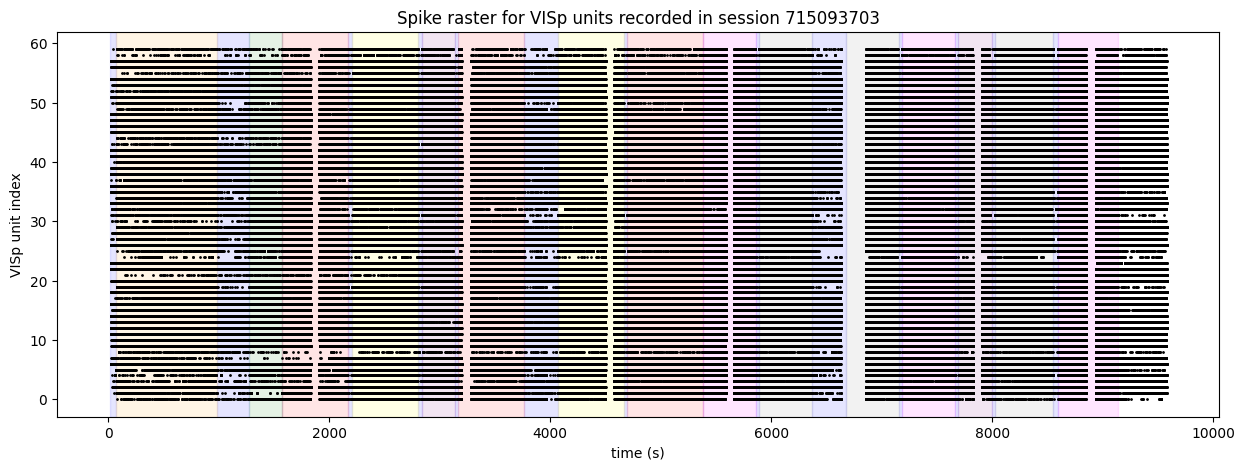

In [17]:
fig, ax = plt.subplots(figsize=(15,5))

for i, (unit_id, st) in enumerate(visp_spike_times.items()):
    ax.plot(st, np.zeros(len(st))+i, 'ko', markersize=1)
    
ax.set_ylabel('VISp unit index')
ax.set_xlabel('time (s)')
ax.set_title('Spike raster for VISp units recorded in session {}'.format(session_id))

colors = ['blue','orange','green','red','yellow','purple','magenta','gray','lightblue']
for c, stim_name in enumerate(session_data.stimulus_names):
    stim = stimulus_epoch_table[stimulus_epoch_table.stimulus_name==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim["start_time"].iloc[j], xmax=stim["stop_time"].iloc[j], color=colors[c], alpha=0.1)

***Explore Further***

- In addition to the session_table, we looked at above, the cache object also has tables for the probes, the channels, and the individual units.  Call the function that returns these tables.  What information do they contain?

- The running speed and pupil size are also available in these data.  Find out how to return them and add them to the plot above.

- Units have quality control metrics and there are default values that we consider "good" units.  What are these default values and what is the distribution of these metrics?  Plot these distributions.

:::{admonition} Remember to consult the Databook!
:::

***Exercise 1***

The above plot is just a raster with the spike times.  You'll often want to compute a firing rate.  Remake the above plot after binning the spikes in 10 ms bins.  


***Exercise 2***

We plotted the stimulus epochs above.  Pick an individual stimulus (e.g. a particular natural scene) and remake the plot above by shading when that particular stimulus was shown.  For natural stimuli, make a figure with the exact stimulus shown.

:::{admonition} Hint #1
:class: dropdown
You will need the `stimulus_table`.  Look inside the `session_data` object or check the data book to see how to find this.
:::
:::{admonition} Hint #2
:class: dropdown
For natural stimuli, you'll want the `stimulus_template`.  Look inside the `cache` object or check the data book.
:::